In [2]:
import os
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip

import cv2


In [ ]:
input_path = ""
output_path = ""

## Video Input

In [3]:
clip1 = VideoFileClip(input_path)
clip1.ipython_display(width = 400)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Single Image Processing

In [86]:
def process_image(gf, t):
    
    image = gf(t)
    
    image_new = image.copy()
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert image to grayscale
    image_mask_white = cv2.inRange(image_gray, 190, 255) #find white image pixels
    image_gauss_gray = cv2.GaussianBlur(image_mask_white, (5, 5), 0) #blur image to reduce noise
    
    v = np.median(image_gauss_gray)
    sigma = 0.33
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    image_edges = cv2.Canny(image_gauss_gray,lower, upper)
    
    image_3d = cv2.cvtColor(image_edges, cv2.COLOR_GRAY2BGR)
    image_3d = cv2.dilate(image_3d,kernel = np.ones((5,5),np.uint8),iterations = 1)
    image_3d[np.where((image_3d==[255,255,255]).all(axis=2))] = [0,255,0]
            
    
    result = cv2.addWeighted(image_new,0.7,image_3d,0.3,0)
    return result

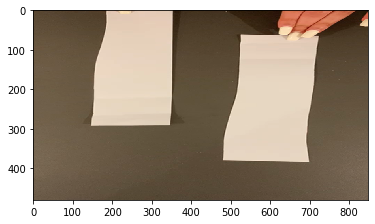

In [89]:
frame = clip1.get_frame(2)
plt.imshow(frame, interpolation ='nearest')

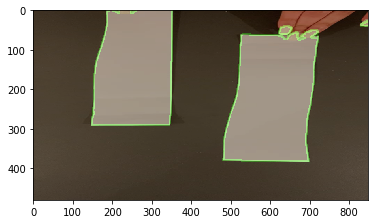

In [90]:
frame_changed = process_image(clip1.get_frame, t = 2)
plt.imshow(frame_changed, interpolation ='nearest', cmap='gray')

## Processed Video Output 

In [88]:
first_frame = 1
clip2 = clip1.fl(process_image, apply_to = ['mask'])
clip2.write_videofile(output_path, audio=False)
clip2.ipython_display(width = 400)

Moviepy - Building video C:\Users\gmoha\OneDrive\Desktop\Oct 2021 - Mar 2022\5 Projects\LineDetection\WhiteLineVideoOutput.mp4.
Moviepy - Writing video C:\Users\gmoha\OneDrive\Desktop\Oct 2021 - Mar 2022\5 Projects\LineDetection\WhiteLineVideoOutput.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\gmoha\OneDrive\Desktop\Oct 2021 - Mar 2022\5 Projects\LineDetection\WhiteLineVideoOutput.mp4
Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
